# Inferential Statistics: Confidence Interval

Importing necessary libraries and loading the example dataset. This fictitious dataset contains the average height (in centimeters) of undergrad students, as well as categorical information about age and if they drink coffee.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

df_full = pd.read_csv('coffee_dataset.csv')
df_full.head(3)

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854


In [57]:
df_full['height_cm'] = (df_full.height * 2.54).round(2)

In [58]:
df_full.head()

,user_id,age,drinks_coffee,height,height_cm
0,4509,<21,False,64.538179,163.93
1,1864,>=21,True,65.824249,167.19
2,2060,<21,False,71.319854,181.15
3,7875,>=21,True,68.569404,174.17
4,6254,<21,True,64.020226,162.61


In [61]:
df_full.drop('height', inplace=True,axis=1)

In [63]:
df_full.rename(columns={'height_cm':'height'}, inplace=True)

In [65]:
df_full.to_csv('undergrad_students.csv',index=False)

`1.` We are interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers.

$$ Height_{Coffee} = Height_{No \space Coffee} $$

Which can be rewritten as:<br>
The difference between the average height of Coffee drinkers and No Coffee drinker is equal to zero.

$$ Height_{Coffee} - Height_{No \space Coffee} = 0$$

First, let's create a sample of size 200 from our full dataset.

We will call it the "*Original Sample*":

In [53]:
df_sample_200 = df_full.sample(200)
df_sample.head(3)

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561


## Bootstrap
Using the Bootstrapping technique, we will generate a new sample of size 200, by drawing 200 random observation from the *original sample* - with replacement.

Then, we calculate the mean height for coffee drinkers and non-coffee drinkers. Lastly, we compute the difference in means for each new sample randomly generated, storing it in a list called `diffs`.

We repeat this process 10,000 times, in order to make sure the Central Limit Theory "kicks in", resulting in a sampling distribution normally distributed.

>**Note**: we will have three arrays at the end of the iterations - one for each mean and one for the difference in means. Each array is of size 10,000.

In [52]:
# instantiate empty list
diffs = []
for _ in range(10000):
    boot_sample = df_sample_200.sample(200, replace=True)
    boot_h_c = boot_sample.query('drinks_coffee == True').height.mean()
    boot_h_not_c = boot_sample.query('drinks_coffee == False').height.mean()
    diffs.append(boot_h_c - boot_h_not_c)

In [26]:
print(f'Sampling Distribution Mean: {np.mean(diffs):.3f}')
print(f'Sampling Distribution Std: {np.std(diffs):.3f}')

Sampling Distribution Mean: 1.332
Sampling Distribution Std: 0.473


In [51]:
height_coffee = df_sample.query('drinks_coffee == True').height
height_no_coffee = df_sample.query('drinks_coffee == False').height

actual_mean_difference = height_coffee.mean() - height_no_coffee.mean()
print(f'Original Sample Mean Height Difference: {actual_mean_difference:.3f}')

Original Sample Mean Height Difference: 1.335


Checking the difference between the average height of both groups, we can see the mean of our Sampling Distribution (1.332) closely approximates the actual mean difference observed in the original sample (1.335).

## Confidence Interval
Let's find the lower and upper bounds of the interval containing the correct parameter with a confidence level of 95%:
$\alpha = 0.05$

In [50]:
lower, upper = np.percentile(diffs, 2.5) , np.percentile(diffs, 97.5)
print(f'Confidence Interval: [{lower:.2f}, {upper:.2f}]')

Confidence Interval: [0.39, 2.26]


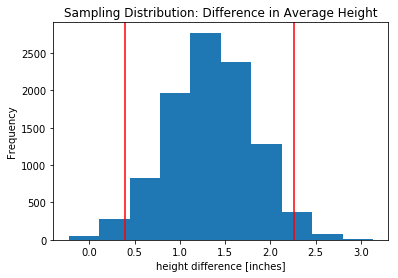

In [48]:
plt.hist(diffs);
plt.title('Sampling Distribution: Difference in Average Height')
plt.xlabel('height difference [inches]')
plt.ylabel('Frequency');
plt.axvline(lower, color='r')
plt.axvline(upper, color='r');

In [7]:
boot_height_coffee = np.random.choice(height_coffee, (10000, 200)).mean(axis=1)
boot_height_no_coffee = np.random.choice(height_no_coffee, (10000, 200)).mean(axis=1)

delta_height = boot_height_coffee - boot_height_no_coffee

In [8]:
boot_height_coffee.std() , boot_height_no_coffee.std(), delta_height.std()

(0.18833916799053518, 0.25719890412157209, 0.31777268658000996)

## Simulating from the Null
Based on the standard deviation of the Sampling Distribution of the difference of means (average height), we can simulate a normal distribution based on the mean value stated by the Null hypotheses: 0

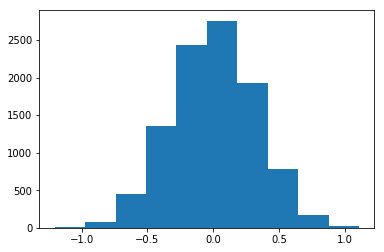

In [10]:
null_mean = 0
plt.hist(np.random.normal(null_mean, delta_height.std(), 10000));

# Using the typical way

As we can see, the second method takes longer and presents a bigger standard deviation. Which will affect the results!

In the first method we are filtering the groups and then bootstrapping the average height with 200 sample size. That is, we are using the exact same amount of height for each group. Which, by the Law of Large Numbers, will result in a more accurate estimation for the parameter.

But we do not want that, since our original sample actually is unbalanced. Therefore, we also want to capture this characteristic from the original sample, which will lead to a wide confidence interval.

`4.` Now, use your observed sampling distribution for the difference in means to simulate what you would expect the sampling distribution to be if the null hypothesis is true. 

You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`.

## Simulating from the Null
Based on the standard deviation of the Sampling Distribution of the difference of means (average height), we can simulate a normal distribution based on the mean value stated by the Null hypotheses: 0

In [28]:
sim_null = np.random.normal(null_mean,np.std(diffs), 10000)

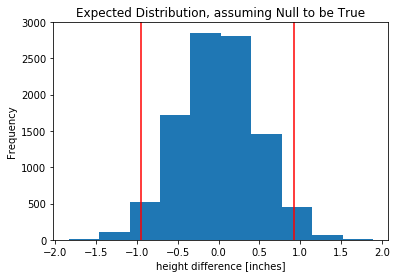

In [35]:
# plotting the Normal Distribution from the Null
plt.hist(sim_null);
plt.title('Expected Distribution, assuming Null to be True')
plt.xlabel('height difference [inches]')
plt.ylabel('Frequency');

# plotting the CI
plt.axvline(lower, color='r')
plt.axvline(upper, color='r');